In [2]:
import pandas as pd
from pandas import Series,DataFrame
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.pyplot import subplot

import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

!pip install pandas-datareader
import pandas_datareader.data as web
from datetime import datetime

In [3]:
tech_list = ['AAPL','GOOG','MSFT','AMZN']

In [4]:
end = datetime.now()

In [5]:
start = datetime(end.year-1,end.month,end.day)

In [7]:
amzn = pd.read_csv("AMZN.csv")
aple= pd.read_csv("AA.csv")
ggle= pd.read_csv("GOOG.csv")
msft= pd.read_csv("MSFT.csv")

In [8]:
amzn['company']= "amazon"
amzn['company']= "amazon"
ggle["company"]= "google"
msft["company"]= "microsoft"

In [9]:
stocks = pd.concat([amzn,aple,ggle,msft])

In [10]:
amzn

,Date,Open,High,Low,Close,Adj Close,Volume,company
0,2022-06-29,107.379997,110.989998,106.910004,108.919998,108.919998,66375300,amazon
1,2022-06-30,108.110001,108.180000,102.519997,106.209999,106.209999,97679400,amazon
2,2022-07-01,106.290001,109.750000,105.849998,109.559998,109.559998,73021200,amazon
3,2022-07-05,107.599998,114.080002,106.320000,113.500000,113.500000,76583700,amazon
4,2022-07-06,113.209999,115.480003,112.010002,114.330002,114.330002,66958900,amazon
...,...,...,...,...,...,...,...,...
247,2023-06-23,129.110001,130.839996,128.279999,129.330002,129.330002,71855200,amazon
248,2023-06-26,129.330002,131.490005,127.099998,127.330002,127.330002,59989300,amazon
249,2023-06-27,128.630005,130.089996,127.550003,129.179993,129.179993,46801000,amazon
250,2023-06-28,128.940002,131.479996,128.440002,129.039993,129.039993,52149500,amazon


In [11]:
amzn.describe()

,Open,High,Low,Close,Adj Close,Volume
count,252.000000,252.000000,252.000000,252.000000,252.000000,2.520000e+02
mean,108.923691,110.675080,107.212579,108.998611,108.998611,6.749552e+07
std,15.543737,15.746203,15.486361,15.602133,15.602133,2.551833e+07
min,82.800003,83.480003,81.430000,81.820000,81.820000,3.508860e+07
25%,96.077501,97.642498,94.232499,96.289999,96.289999,5.195025e+07
50%,105.370002,107.470001,104.215000,105.745003,105.745003,6.095135e+07
75%,120.939997,122.939999,119.252499,121.102497,121.102497,7.334678e+07
max,143.910004,146.570007,142.000000,144.779999,144.779999,2.231334e+08


In [12]:
stocks.head()

,Date,Open,High,Low,Close,Adj Close,Volume,company
0,2022-06-29,107.379997,110.989998,106.910004,108.919998,108.919998,66375300,amazon
1,2022-06-30,108.110001,108.180000,102.519997,106.209999,106.209999,97679400,amazon
2,2022-07-01,106.290001,109.750000,105.849998,109.559998,109.559998,73021200,amazon
3,2022-07-05,107.599998,114.080002,106.320000,113.500000,113.500000,76583700,amazon
4,2022-07-06,113.209999,115.480003,112.010002,114.330002,114.330002,66958900,amazon


In [13]:
stocks.to_csv('Stocks.csv',index=False)

In [14]:
stocks.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1008 entries, 0 to 251
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1008 non-null   object 
 1   Open       1008 non-null   float64
 2   High       1008 non-null   float64
 3   Low        1008 non-null   float64
 4   Close      1008 non-null   float64
 5   Adj Close  1008 non-null   float64
 6   Volume     1008 non-null   int64  
 7   company    756 non-null    object 
dtypes: float64(5), int64(1), object(2)
memory usage: 70.9+ KB


In [15]:
stocks.isna().sum()

Date           0
Open           0
High           0
Low            0
Close          0
Adj Close      0
Volume         0
company      252
dtype: int64

In [16]:
stocks.duplicated().sum()

0

In [17]:
Companies = stocks['company'].drop_duplicates().values
print(Companies)

['amazon' nan 'google' 'microsoft']


KeyError: nan

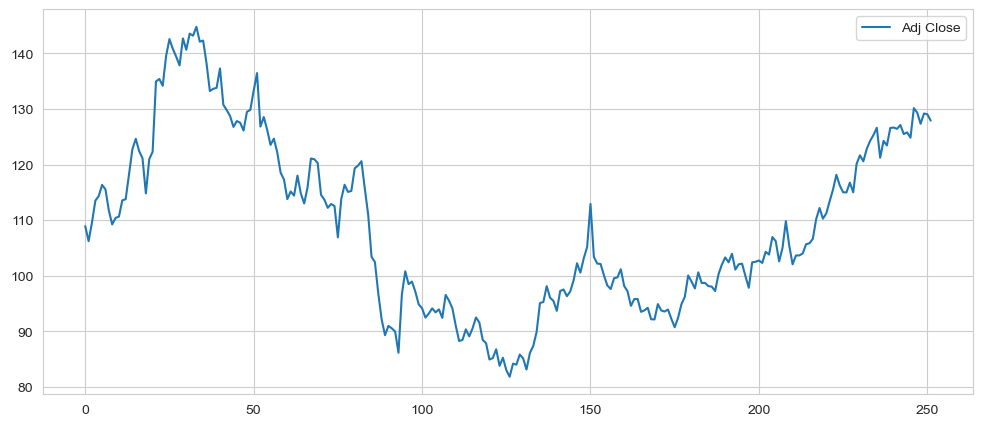

In [18]:
grouped = stocks.groupby('company')
fig, ax = plt.subplots()

for comp in Companies:
    stock = grouped.get_group(comp)
    stock['Adj Close'].plot(legend=True,figsize=(12,5), ax=ax)

ax.legend(Companies)

Let us look at the price trend of individual stocks

<Axes: title={'center': "Amazon's Stock Trend"}>

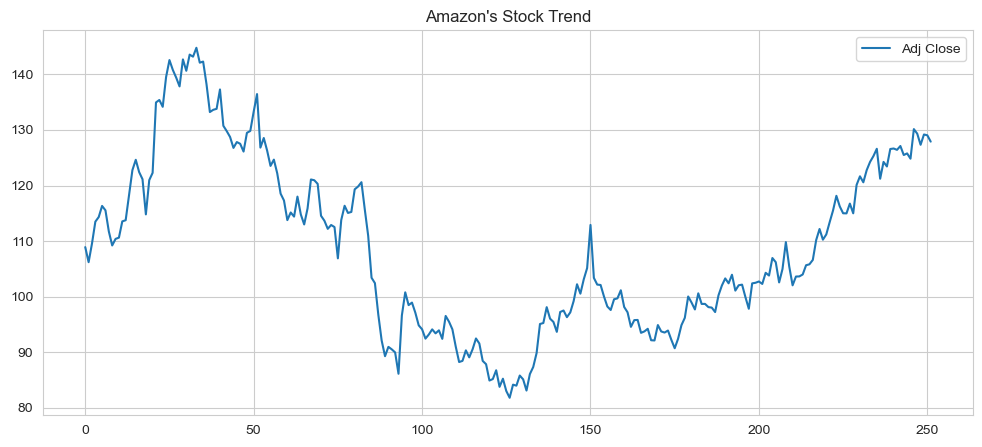

In [19]:
amzn['Adj Close'].plot(legend=True,figsize=(12,5),title = "Amazon's Stock Trend")

<Axes: title={'center': "Microsoft's Stock Trend"}>

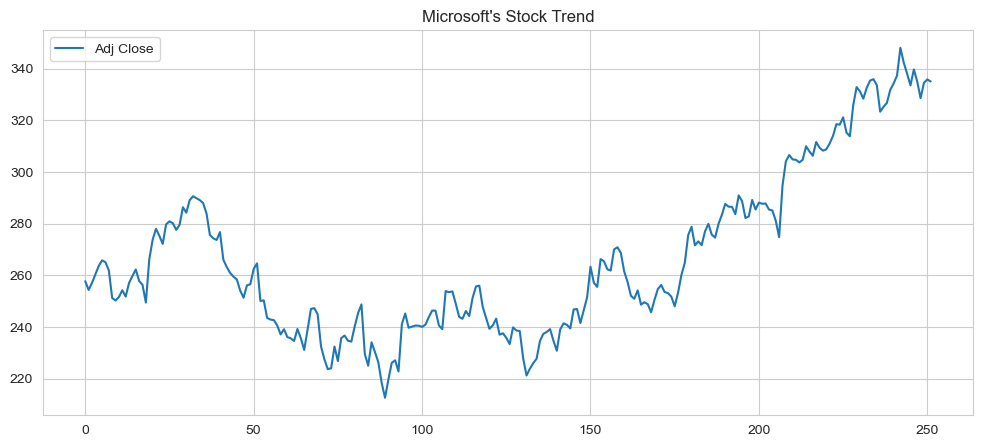

In [20]:
#Plotting the stock's adjusted closing price using pandas
msft['Adj Close'].plot(legend=True,figsize=(12,5),title = "Microsoft's Stock Trend")

#### Visualize the change in a stock’s volume being traded, over time

<Axes: >

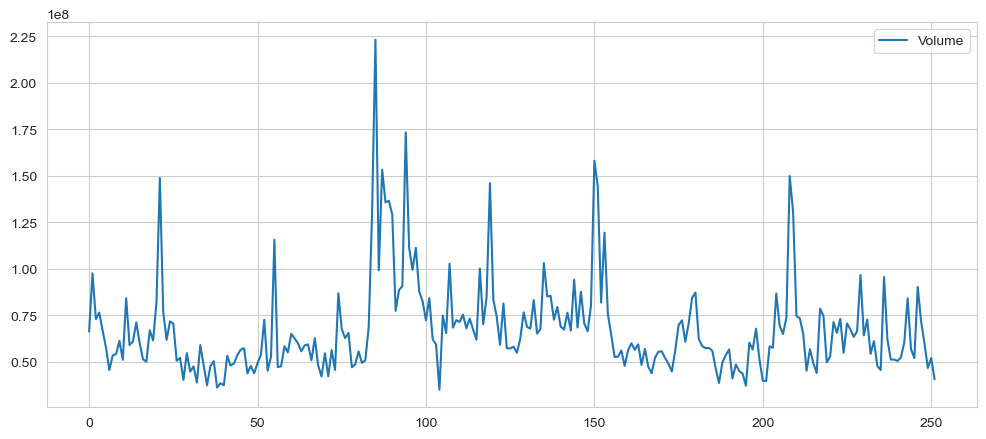

In [21]:
#Plotting the total volume being traded over time
amzn['Volume'].plot(legend=True,figsize=(12,5))

<Axes: >

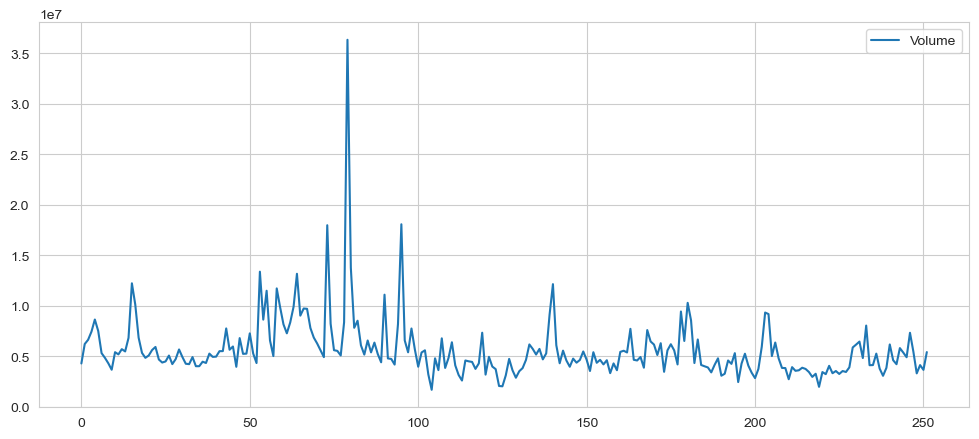

In [22]:
aple['Volume'].plot(legend=True,figsize=(12,5))

<Axes: >

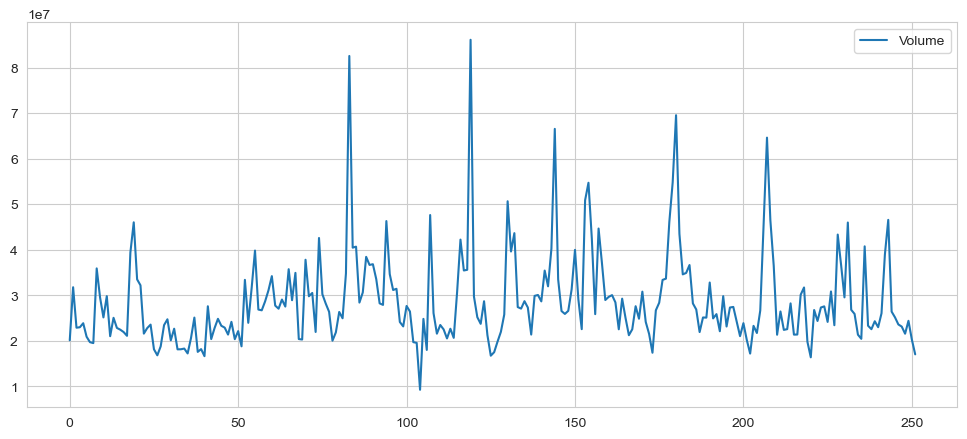

In [23]:
msft['Volume'].plot(legend=True,figsize=(12,5))

<Axes: >

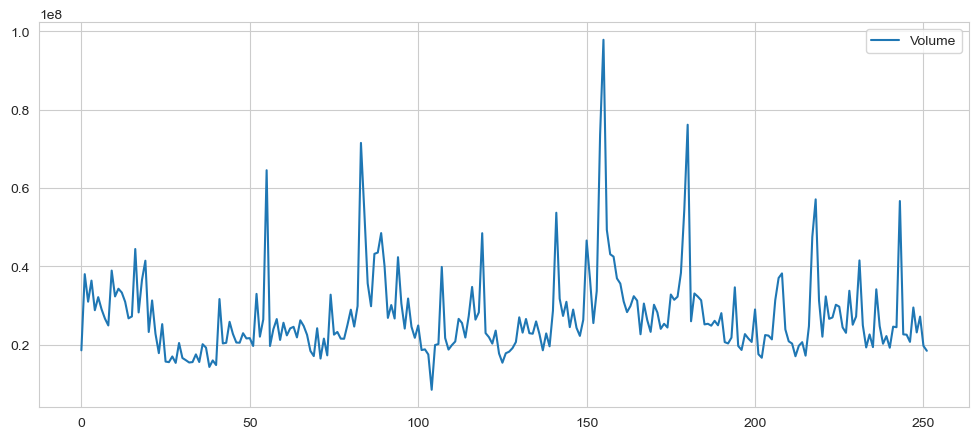

In [24]:
ggle['Volume'].plot(legend=True,figsize=(12,5))

#### **What was the moving average of various stocks?**

In [26]:
ma_per_day = [20,50,100]

for ma in ma_per_day:
    column_name = "MA for %s days" %(str(ma))
    
    amzn[column_name] = amzn['Adj Close'].rolling(window=ma,center=False).mean()

In [27]:
amzn.tail()

,Date,Open,High,Low,Close,Adj Close,Volume,company,MA for 20 days,MA for 50 days,MA for 100 days
247,2023-06-23,129.110001,130.839996,128.279999,129.330002,129.330002,71855200,amazon,124.376500,114.538001,106.4512
248,2023-06-26,129.330002,131.490005,127.099998,127.330002,127.330002,59989300,amazon,124.993001,115.036601,106.6932
249,2023-06-27,128.630005,130.089996,127.550003,129.179993,129.179993,46801000,amazon,125.446500,115.570000,106.9335
250,2023-06-28,128.940002,131.479996,128.440002,129.039993,129.039993,52149500,amazon,125.815500,116.096000,107.0948
251,2023-06-29,128.770004,129.259995,127.260002,127.900002,127.900002,40696000,amazon,126.181500,116.608000,107.3399


<Axes: >

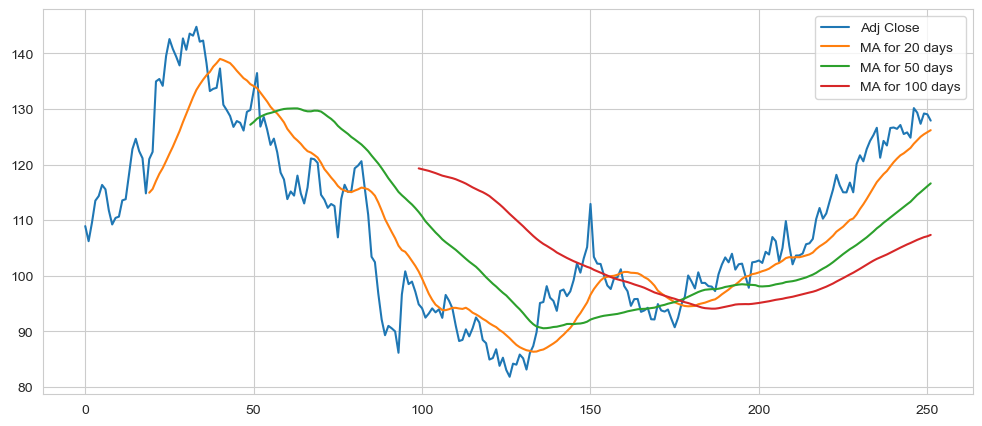

In [28]:
amzn[['Adj Close','MA for 20 days','MA for 50 days','MA for 100 days']].plot(subplots=False,figsize=(12,5))

<Axes: >

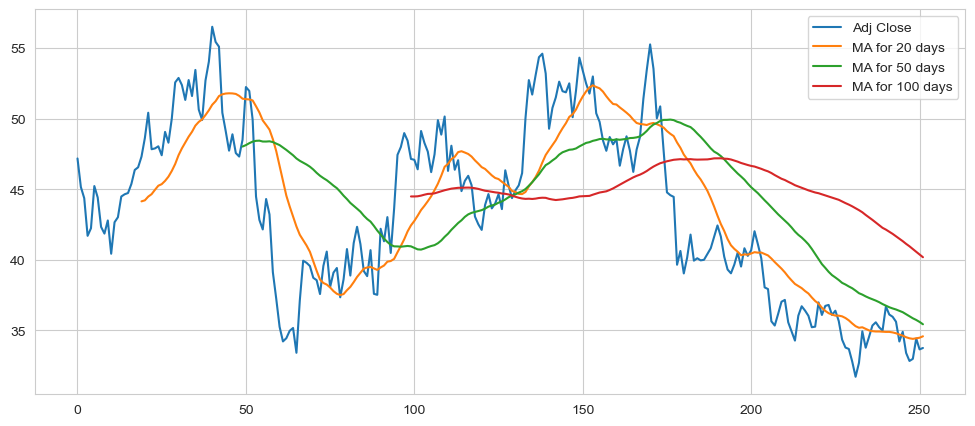

In [46]:
ma_per_day = [20,50,100]

for ma in ma_per_day:
    column_name = "MA for %s days" %(str(ma))
    
    aple[column_name] = aple['Adj Close'].rolling(window=ma,center=False).mean()
aple[['Adj Close','MA for 20 days','MA for 50 days','MA for 100 days']].plot(subplots=False,figsize=(12,5))

<Axes: >

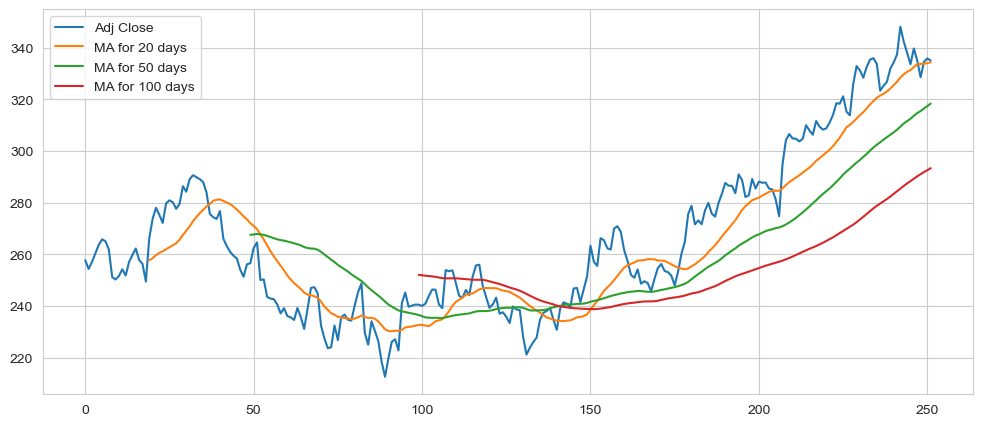

In [47]:
ma_per_day = [20,50,100]

for ma in ma_per_day:
    column_name = "MA for %s days" %(str(ma))
    
    msft[column_name] = msft['Adj Close'].rolling(window=ma,center=False).mean()
msft[['Adj Close','MA for 20 days','MA for 50 days','MA for 100 days']].plot(subplots=False,figsize=(12,5))

<Axes: >

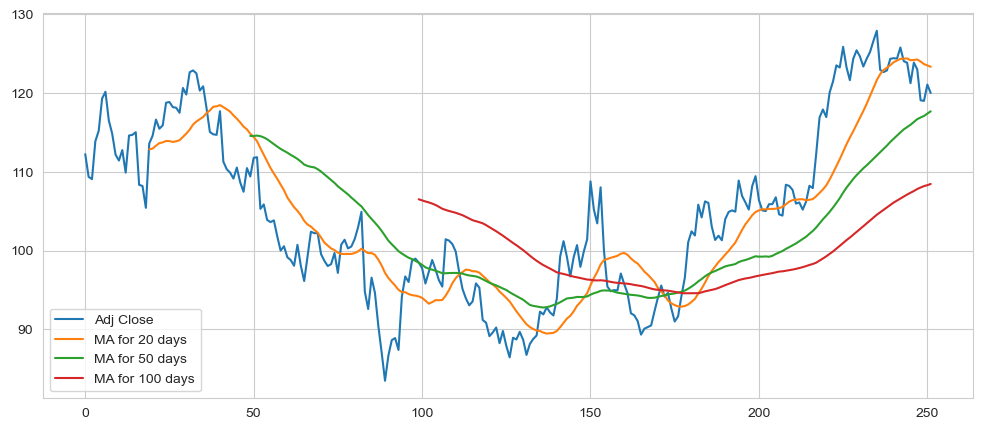

In [48]:
ma_per_day = [20,50,100]

for ma in ma_per_day:
    column_name = "MA for %s days" %(str(ma))
    
    ggle[column_name] = ggle['Adj Close'].rolling(window=ma,center=False).mean()
ggle[['Adj Close','MA for 20 days','MA for 50 days','MA for 100 days']].plot(subplots=False,figsize=(12,5))

#### **What was the daily return average of a stock?**

In [30]:
amzn['Daily Return'] = amzn['Adj Close'].pct_change()

In [49]:
aple['Daily Return'] = aple['Adj Close'].pct_change()

In [50]:
ggle['Daily Return'] = ggle['Adj Close'].pct_change()

In [51]:
msft['Daily Return'] = msft['Adj Close'].pct_change()

In [31]:
amzn['Daily Return'].tail()

247   -0.006300
248   -0.015464
249    0.014529
250   -0.001084
251   -0.008834
Name: Daily Return, dtype: float64

<Axes: >

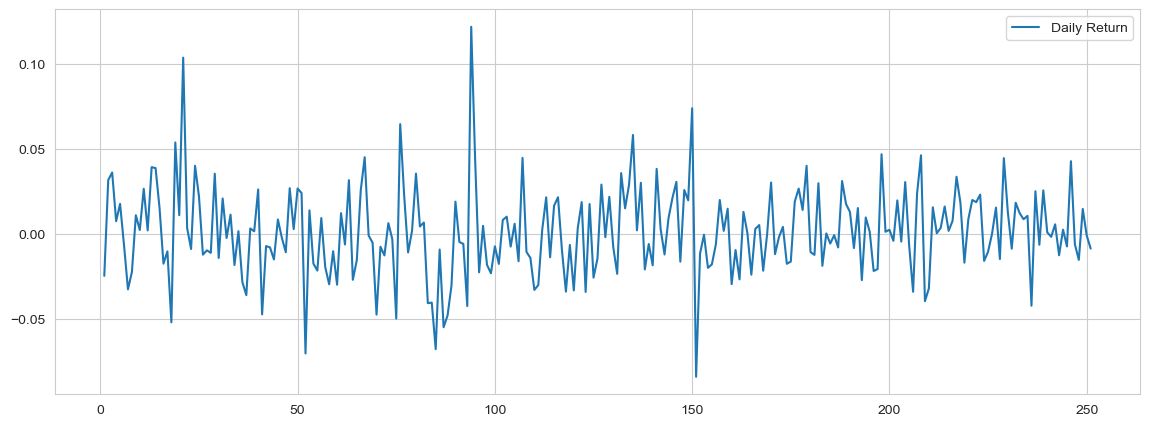

In [32]:
amzn['Daily Return'].plot(figsize=(14,5),legend=True)

<Axes: >

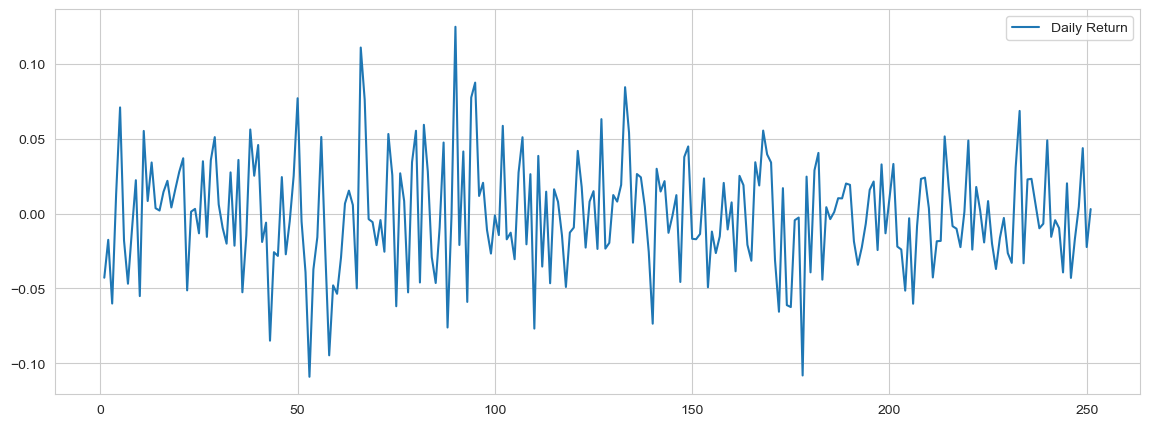

In [52]:
aple['Daily Return'].plot(figsize=(14,5),legend=True)

<Axes: >

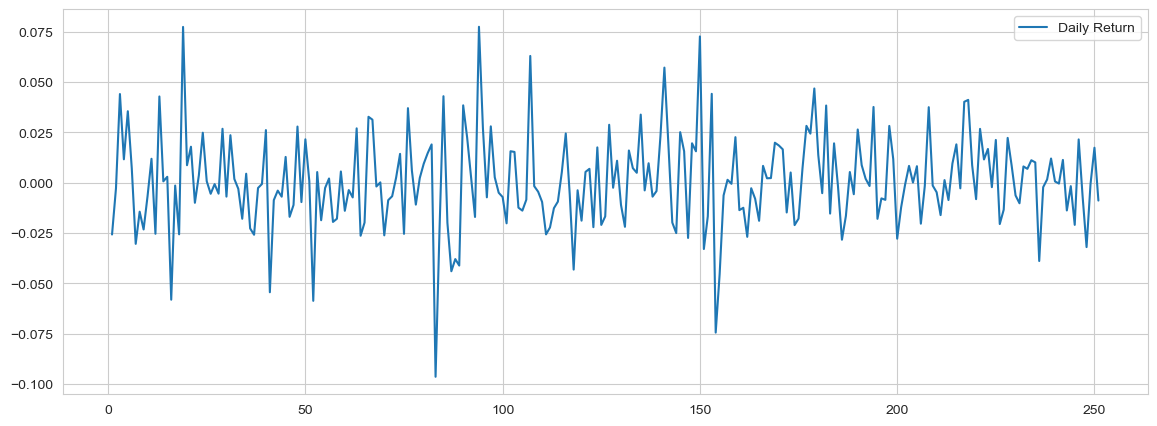

In [53]:
ggle['Daily Return'].plot(figsize=(14,5),legend=True)

<Axes: >

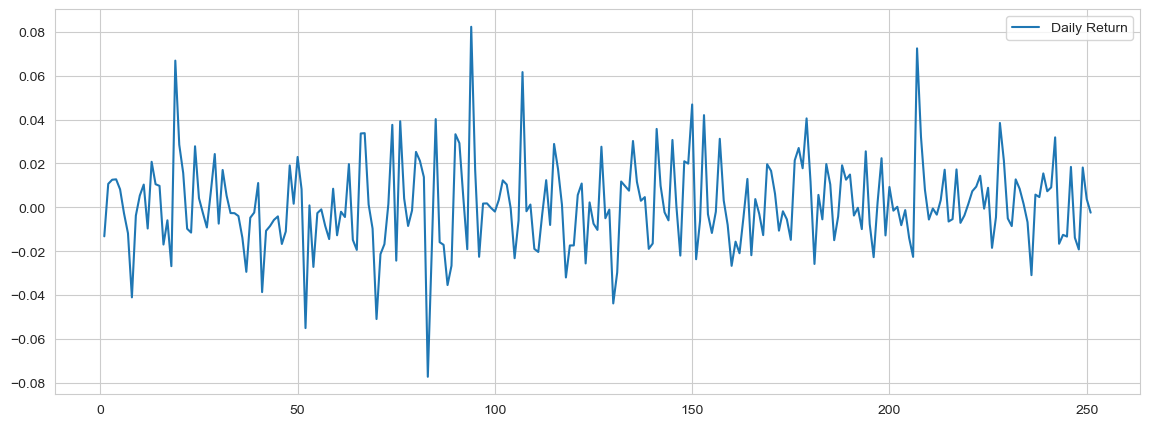

In [54]:
msft['Daily Return'].plot(figsize=(14,5),legend=True)

C:\Users\SuperTech\AppData\Local\Temp\ipykernel_12120\3628871770.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(amzn['Daily Return'].dropna(),bins=100,color='red',kde=False,ax=ax)


<Axes: xlabel='Daily Return'>

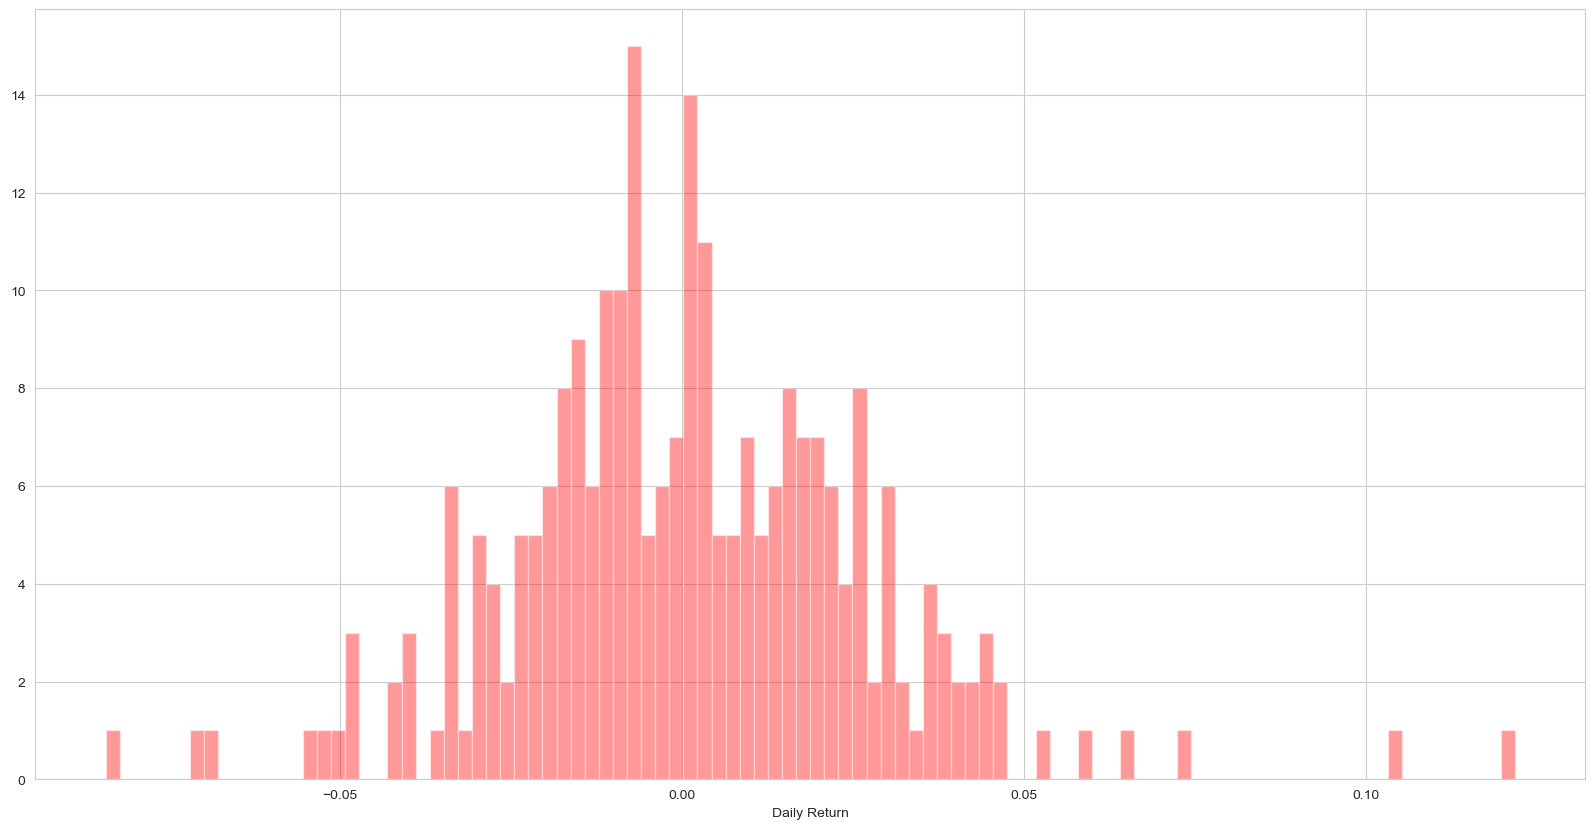

In [33]:
f,ax=plt.subplots(figsize=(20,10))
sns.distplot(amzn['Daily Return'].dropna(),bins=100,color='red',kde=False,ax=ax)

#### **Add a new column ‘Trend’ whose values are based on the 'Daily Return'**


In [55]:
def trend(x):
  if x > -0.015 and x <= 0.015:
    return 'Slight or No change'
  elif x > 0.015 and x <= 0.04:
    return 'Slightly Positive'
  elif x < -0.015 and x >= -0.4:
    return 'Slightly Negative'
  elif x > 0.04 and x <= 0.06:
    return 'Positive'
  elif x < -0.04 and x >= -0.06:
    return 'Negative'
  elif x > 0.06 and x <= 0.07:
    return 'Among top gainers'
  elif x < -0.06 and x >= -0.07:
    return 'Among top losers'
  elif x > 0.07:
    return 'Bullish run'
  elif x <= -0.07:
    return 'Bear drop'
amzn['Trend']= np.zeros(amzn['Daily Return'].count()+1)
amzn['Trend']= amzn['Daily Return'].apply(lambda x:trend(x))
amzn.tail(5)

,Date,Open,High,Low,Close,Adj Close,Volume,company,MA for 20 days,MA for 50 days,MA for 100 days,Daily Return,Trend
247,2023-06-23,129.110001,130.839996,128.279999,129.330002,129.330002,71855200,amazon,124.376500,114.538001,106.4512,-0.006300,Slight or No change
248,2023-06-26,129.330002,131.490005,127.099998,127.330002,127.330002,59989300,amazon,124.993001,115.036601,106.6932,-0.015464,Slightly Negative
249,2023-06-27,128.630005,130.089996,127.550003,129.179993,129.179993,46801000,amazon,125.446500,115.570000,106.9335,0.014529,Slight or No change
250,2023-06-28,128.940002,131.479996,128.440002,129.039993,129.039993,52149500,amazon,125.815500,116.096000,107.0948,-0.001084,Slight or No change
251,2023-06-29,128.770004,129.259995,127.260002,127.900002,127.900002,40696000,amazon,126.181500,116.608000,107.3399,-0.008834,Slight or No change


#### **Visualize the trend frequency through a Pie Chart**

Text(0.5, 1.0, 'Trend Frequency using a Pie Chart')

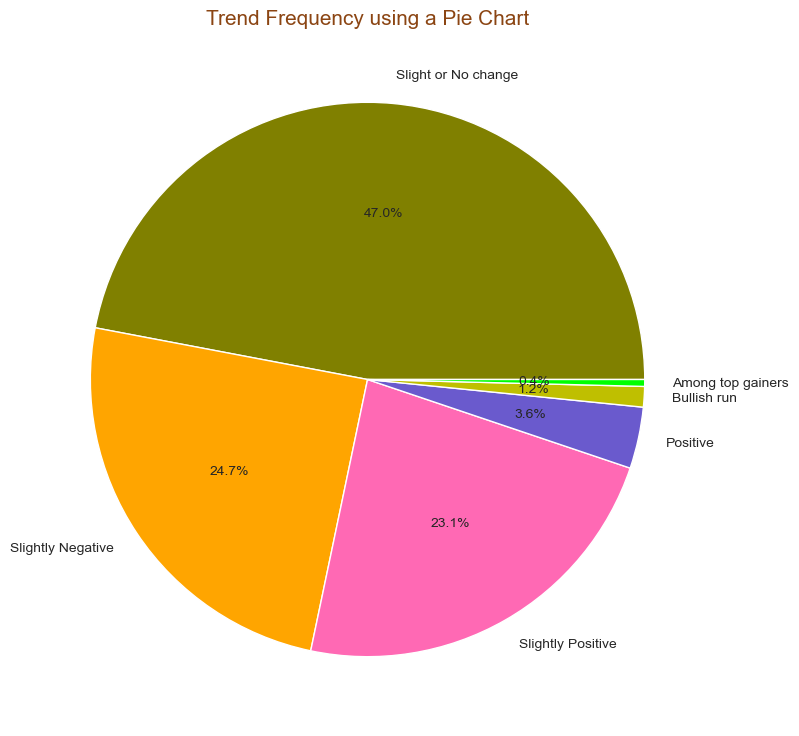

In [56]:
labels=amzn.Trend.value_counts().index
colors=["olive","orange","hotpink","slateblue","y","lime"]
sizes=amzn.Trend.value_counts().values
plt.figure(figsize=(9,9))
plt.pie(sizes,labels=labels,colors=colors,autopct="%1.1f%%")
plt.title("Trend Frequency using a Pie Chart",color="saddlebrown",fontsize=15)

#### **What was the correlation between daily returns of different stocks?**

In [39]:
all_adj = pd.concat([amzn['Adj Close'] ,ggle['Adj Close'],aple['Adj Close'],msft['Adj Close']], axis = 1)

In [40]:
all_adj.columns = ['Apple','Google','Amazon','Microsoft']

In [41]:
all_adj

,Apple,Google,Amazon,Microsoft
0,108.919998,112.256500,47.184330,257.768372
1,106.209999,109.372498,45.162994,254.371185
2,109.559998,109.081001,44.370316,257.094818
3,113.500000,113.887001,41.704926,260.333588
4,114.330002,115.213501,42.239986,263.661377
...,...,...,...,...
247,129.330002,123.019997,32.840000,335.019989
248,127.330002,119.089996,32.990002,328.600006
249,129.179993,119.010002,34.430000,334.570007
250,129.039993,121.080002,33.660000,335.850006


In [42]:
pct_df = all_adj.pct_change()
pct_df.tail()

,Apple,Google,Amazon,Microsoft
247,-0.006300,-0.006862,-0.017061,-0.013806
248,-0.015464,-0.031946,0.004568,-0.019163
249,0.014529,-0.000672,0.043650,0.018168
250,-0.001084,0.017393,-0.022364,0.003826
251,-0.008834,-0.008837,0.002971,-0.002382


<Axes: >

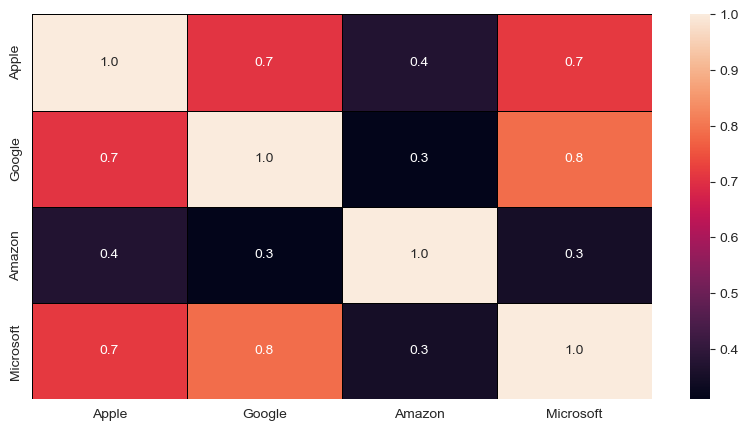

In [58]:
f,ax=plt.subplots(figsize=(10,5))
sns.heatmap(pct_df.corr(),annot=True,linewidths=0.5,linecolor="black",fmt=".1f",ax=ax) 

Microsoft seems to have the highest correlation with Apple as well as Google. 